# **Deep Learning - Classification Binaire - Modèle et Erreur Classique**

Nous allons voir dans ce programme l'**approche classique** à utiliser pour un problème de **Classification Binaire** en **NLP**, un problème de **classification à deux options** avec **des données textes**.

Pour cela nous utilisons un jeu de données disponible dans la librairie **Keras**.

Ce **jeu de données** est composé :
- de **critiques de films**
- de **labels** (0 ou 1) associés à chaque critique

Les labels indiquent si la critique est positive (1) ou négative (0).

Le but de notre modèle de **Deep Learning** sera de déterminer à partir d'une critique si l'**auteur** a **aimé le film ou non**, c'est-à-dire si la critique est positive ou non.

Nous allons donc **entraîner notre modèle** sur des données d'entraînement puis le **tester**, vérifier **ses capacités** sur des données de test.

Il y a en tout **50 000 critiques** et donc **50 000 labels**.


## **Préparer nos données**

### **Charger nos données**

Premièrement, on **charge les données** depuis le **package imdb**.

*train_data* et *train_labels* sont les données sur lesquels on va **entraîner notre modèle**. On entraîne notre modèle à **prédire les labels** à partir  **des data**.

Ensuite on pourra **tester l'efficacité** du modèle en faisant des **prédiction** sur les *test_data* et en **comparant** ces prédictions de label au véritable label *test_labels*. 



In [ ]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

Les **critiques de films** (stockées dans *train_data* et *test_data*) on **déjà** était préprocesser, **prétraiter**.

C'est-à-dire que **les critiques** ont était **transformées**, **encodées en chiffres**.

Ainsi, une **phrase** est **représentée** par une **liste de chiffres**.

Chaque **chiffre** représente un **mot**.


*num_words=10000* veut dire qu'on a gardé les **10 000 mots les plus fréquents** dans l'**ensemble de critique**.

On a donc une **liste de 10 000 mots** et chaque mot de chaque phrase fait **référence** à un des mots **dans cette liste**.

Si une phrase contient le **mot numéro 15**, pour le **connaitre** il faut voir le numéro 15 de la **liste des 10 000 mots**.





On peut **vérifier** cela en affichant la **premiere critique** :

In [ ]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


**Vérifier nos données**

On peut aussi **traduire**, décoder **ces critiques** pour les lire en anglais.

Pour cela on **charge** le *word_index*, c'est un **dictionnaire** qui contient **88 584 mots** (les 10 000 mots les plus fréquents que l'on a charger sont tirés de ce dictionnaire).

In [ ]:
word_index = imdb.get_word_index()

Ce **dictionnaire** contient donc **88 584 mots** et un **index** pour **chaque mot**.

L'**index** est en fait une **adresse** qui permet de **récupérer le mot** à partir d'un chiffre en se **référant** au dictionnaire.

Si on reprend notre **exemple précédent** avec le **chiffre 15**, on regarde dans le *word_index* le **mot correspondant** au chiffre 15.

On peut **afficher** les **5 premiers mots** du dictionnaire :

In [ ]:
list(word_index.items())[:5]

[('fawn', 34701),
 ('tsukino', 52006),
 ('nunnery', 52007),
 ('sonja', 16816),
 ('vani', 63951)]

Pour plus de **commodité** et de **rapidité** dans le **décodage** on va inverser le dictionnaire pour avoir l'**index à gauche** et le **mot à droite**.

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

On **ré-affiche** les **5 premiers mots** pour voir le changement :

In [ ]:
list(reverse_word_index.items())[:5]

[(34701, 'fawn'),
 (52006, 'tsukino'),
 (52007, 'nunnery'),
 (16816, 'sonja'),
 (63951, 'vani')]

On peut ensuite **décoder** les critiques.

Ici, pour **chaque chiffre** dans une critique on regarde **son index** dans le dictionnaire.

On récupère les **mot associés** aux **index**.

Puis on **joint** chacun de ces mots pour faire **une phrase**.

In [ ]:
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

On peut aussi **voir** le label associé. La critique est :
- **positive** si le label vaut **1**
- **négative** si le label vaut **0**

In [ ]:
print(train_labels[0])

1


### **Preprocessing - One-hot encoding**

Malgré que les critiques soient **déjà encodés** numériquement il nous faut faire un **deuxième traitement**, un deuxième encodage.

Nous allons faire ce qu'on appelle un **hot-one encoding**.
C'est un encodage **très utilisé** en **NLP**, dans le traitement de texte.

Le **hot-one encoding** consiste à **prendre en compte tous les mots** qui nous intéressent (les **10 000 mots** les plus fréquents). Chaque critique sera donc une **liste de longueur 10 000** et si un mot apparaît dans la critique on l'**encode en 1 sinon en 0**.

Par **exemple**, encoder la séquence [3, 5] nous donnerai **un vecteur** de longueur 10 000 qui sera constitué de 0 **à l'exception** des indices **3 et 5**, qui seront des **1**.


Cela permettra au modèle d'**apprendre plus rapidement** et plus facilement.

On va donc coder la fonction *vectorize_sequences* pour **encoder en one-hot :**

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
      results[i, sequence] = 1.
    return results

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

On peut ensuite **afficher** le premier élément du *x_train* pour voir **concrètement** le one-hot encoding.

In [ ]:
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


Ici on modifie le **type des labels** en **float32** à la place de int64 (notre *x_train* et *x_test* étant eux aussi en format float), pour plus de détails sur les types dans [cet article](https://inside-machinelearning.com/tenseur-et-dtype-uint8-float32-cest-quoi/).

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## **Créer notre modèle de Deep Learning**

### **Structurer**

Pour cette classfication nous avons une configuration très simple des données:
- Les **données d'entrées** en liste de 1 et de 0
- Les **données à prédire** 1 ou 0

Le type de réseau utile dans ce cas est un **empilement de couches Dense**, qu'on appelle encore **couches fully-connected**, car tous les neurones sont reliés à tous les précédent. Ils sont **totalement connectés** (voir [cet article](https://inside-machinelearning.com/le-deep-learning-cest-quoi/) pour plus d'informations sur les neurones).

On utilise par contre des **fonctions d'activation** différentes.

- **relu** pour les deux premières
- **sigmoïd** pour la dernière

Un **article entier** sera redigé sur ces **fonctions d'activation**. **Pour le moment** il suffit juste de savoir que la **fonction sigmoïd** permet d'avoir **une probabilité entre 0 et 1**.

Ainsi plus le résultat sera **proche de 1** plus la **critique sera positive** et inversement.

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Pour bien **comprendre** ce qu'il se passe **dans ce modèle** on peut regarder le **schèma associé** grâce à la fonction *plot_model()*.

On peut notamment voir le **changement de dimension** qui s'opère sur **nos données** en regardant sur la **partie droite** de chaque couche.

Ainsi, on commence avec une **liste de 10 000 mots** (one-hot encoded) donc une liste de longueur 10 000.

Puis la première couche Dense **applique une transformation** et produit une **liste de longueur 16**.

La **deuxième couche** applique aussi une transformation pour produire une liste de **longueur 16**.

Et enfin, la dernière couche applique une transformation qui produit **une probabilité entre 0 et 1**, donc un seul chiffre, **une seule dimension**.

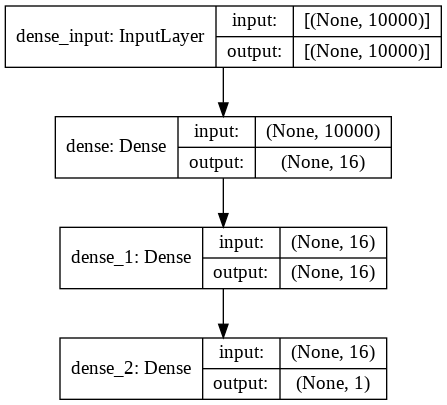

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

### **Entraîner**

**Dernière préparation** avant d'utiliser le modèle.

Il faut **séparer** ces données en deux types :
- les **données d'entraînement** vont servir à entraîner le modèle
- les **données de validation** vont valider son apprentissage

En fait, cela permet d'éviter un **problème fréquent** en Machine Learning: l'**overfitting**.

L'**overfitting**, c'est le fait qu'un modèle se **spécialise tellement** sur ses données d'apprentissage qu'il devient **inefficace** sur d'autres données, **des données réelles**. On appelle aussi ce phénomène le **surapprentissage**.

C'est comme si vous vous entrainiez **tous les jours** au tennis mais **seulement de votre revers**. Dans un match réel vous serez très **performant** sur **vos revers** mais vos **coups droits** ne seront pas **si bon**..

L'**idée** c'est de bien entraîner notre modèle sur des **données générales** et de **ne pas le surentraîner**.

Le *x_train* de base est composés de **25 000 listes**, chacune de **longueur 10 000**. 

On **sépare ces données** ainsi:
- **15 000 listes** pour les données d'entraînements
- **10 000 listes** pour les données de validation

In [ ]:
 x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

On peut ensuite **compiler le modèle** en choisissant l'**optimizer**, la **loss function** et la **métrique**.

Puis **entraîner le modèle** avec la fonction *fit()*.

La variable *history* nous permet de garder l'**historique de l'apprentissage**.

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 48ms/step - loss: 0.6044 - accuracy: 0.7090 - val_loss: 0.4129 - val_accuracy: 0.8692
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.3525 - accuracy: 0.8934 - val_loss: 0.3283 - val_accuracy: 0.8761
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2530 - accuracy: 0.9215 - val_loss: 0.2859 - val_accuracy: 0.8926
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1934 - accuracy: 0.9392 - val_loss: 0.2743 - val_accuracy: 0.8894
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1599 - accuracy: 0.9512 - val_loss: 0.2764 - val_accuracy: 0.8891
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1343 - accuracy: 0.9597 - val_loss: 0.2858 - val_accuracy: 0.8852
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1090 - accuracy: 0.9668 - val_loss: 0.3015 - val_accuracy: 0.8851
Epoch 8/20
30

**Évaluer**

Dans la variable *history* on a les valeurs de la loss et de l'accuracy, **la perte** et **la précision**.

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Nous allons **tracer un graphe** avec ces valeurs pour **analyser l'apprentissage** de notre modèle.

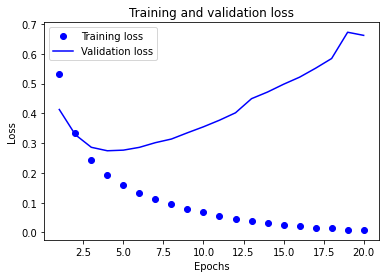

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

On voit au niveau des **premiers epoch** que la perte sur les données d'**entraînement** et celle sur les données de **validation** **diminue de manière similaire**.

Très vite les courbes ne **diminue plus aussi vite** (ce qui est normal) et à un moment, **à l'epoch 4**, la **perte** sur les données de validation **augmente** et ne rebaisse plus.

C'est exactement là qu'est l'**overfitting**.

Le modèle se **spécialise sur les données d'entraînement** donc la loss ne fait que **diminuer pour ces données** mais en se spécialisant autant il n'est **plus capable d'être performant** sur les données de validation et, du manière générale, sur **les données réelles**.

On peut d'ailleurs **vérifier ce fait** en traçant la courbe de la **précision** du modèle sur les données d'**entraînement** et sur les données de **validation**.

Effectivement, la **précision diminue** à partir de l'**epoch 4** pour les **données de validation** alors qu'elle **continue d'augmenter** pour les données d'entraînement.

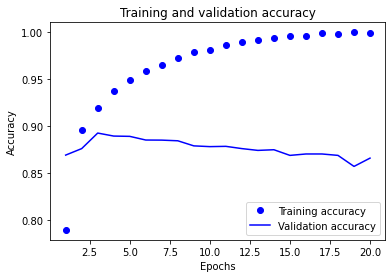

In [ ]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


On peut aussi **evaluer** notre modèle sur les données de test.

On a **à gauche la perte** et **à droite la précision**.

Ici **attention** à ne pas **confondre** les deux métriques:
- la **précision peut etre prise en pourcentage**, si elle est de 0,85 alors 85%
- la **perte elle n'est pas un pourcentage**, notre but est seulement de la faire tendre vers 0

In [ ]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.7295 - accuracy: 0.8502


[0.7295163869857788, 0.8501999974250793]

**Après** cette analyse, on peut **améliorer** notre modèle.

### **Améliorer**

On a vu que le **modèle apprend** très bien sur les données d'entraînement mais moins bien sur les données de validation.

Notre modèle **atteind son pic** de performance à l'**epoch 4**.

**Qu'à cela ne tienne !** On va **réduire le nombre d'epoch** pour **améliorer la performance** de notre modèle !

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 25ms/step - loss: 0.5508 - accuracy: 0.7375
Epoch 2/4
49/49 [==============================] - 1s 24ms/step - loss: 0.2714 - accuracy: 0.9096
Epoch 3/4
49/49 [==============================] - 1s 23ms/step - loss: 0.2026 - accuracy: 0.9294
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.2914 - accuracy: 0.8845


Et voilà ! On peut **évaluer à nouveau notre modèle** sur les données de test pour **voir l'amélioration** qui a eu lieu sur la **perte** (plus basse) et sur la **précision** (plus haute).

In [ ]:
print(results)

[0.2913535237312317, 0.8844799995422363]

Pour **utiliser le modèle** sur de **nouvelles données**, rien de plus simple, il faut utiliser la fonction *predict()*.

Cela va **générer la probabilité** que les critiques soient **positives**.

In [ ]:
model.predict(x_test[0:2])

array([[0.20192459],
       [0.99917173]], dtype=float32)

In [ ]:
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in test_data[0]])

print('Probabilité que la critique soit positive : '+str(model.predict(x_test[0:1])))
print('Critique : '+decoded_review)

Probabilité que la critique soit positive : [[0.13045216]]
Critique : ? please give this one a miss br br ? ? and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite ? so all you madison fans give this a miss


In [ ]:
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in test_data[1]])

print('Probabilité que la critique soit positive : '+str(model.predict(x_test[1:2])))
print('Critique : '+decoded_review)

Probabilité que la critique soit positive : [[0.99968565]]
Critique : ? this film requires a lot of patience because it focuses on mood and character development the plot is very simple and many of the scenes take place on the same set in frances ? the sandy dennis character apartment but the film builds to a disturbing climax br br the characters create an atmosphere ? with sexual tension and psychological ? it's very interesting that robert altman directed this considering the style and structure of his other films still the trademark altman audio style is evident here and there i think what really makes this film work is the brilliant performance by sandy dennis it's definitely one of her darker characters but she plays it so perfectly and convincingly that it's scary michael burns does a good job as the mute young man regular altman player michael murphy has a small part the ? moody set fits the content of the story very well in short this movie is a powerful study of loneliness se

## **Pour aller plus loin...**

**Le Deep Learning c'est avant tout de la pratique !** Il n'y a **pas de secret théorique** qui vous permettra d'améliorer la précision d'un modèle.

**Augmenter la performance** de son modèle c'est des **tests**, des **expérimentations** et du **bidouillage**.

N'hésitez pas à **ajouter des couches de neurones**, changer **les différents hyperparamètres** pour voir les changements que cela opére sur les résultats du modèle.

Ici en **modifiant** la dimension de la *premiere couche Dense*, la *loss function*, le *batch_size* et les *epochs* on obtient un **modèle plus performant !**

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3, batch_size=256)
results = model.evaluate(x_test, y_test)

Epoch 1/3
98/98 [==============================] - 2s 20ms/step - loss: 0.1557 - accuracy: 0.7831
Epoch 2/3
98/98 [==============================] - 2s 20ms/step - loss: 0.0594 - accuracy: 0.9248
Epoch 3/3
782/782 [==============================] - 2s 2ms/step - loss: 0.0912 - accuracy: 0.8789
